In [3]:
#Instalacja biblioteki OpenAI
!pip install --upgrade openai

#Importy
from openai import OpenAI
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import time

#Klucz API OpenAI
client = OpenAI(
    api_key="KLUCZ"
)

#zestaw 20 wiadomości
messages = [
    ("Phishing", "Dział kadr prosi o pilne przesłanie skanu dowodu osobistego w związku z aktualizacją danych pracowniczych."),
    ("Phishing", "Zgodnie z nowymi przepisami RODO, prosimy o potwierdzenie danych dostępowych. Brak reakcji skutkuje blokadą."),
    ("Phishing", "Twoje konto zostało zgłoszone za naruszenie regulaminu. Prosimy o kontakt w celu wyjaśnienia."),
    ("Phishing", "System wykrył podejrzaną próbę logowania z Twojego adresu IP. Odpowiedz, jeśli to nie Ty."),
    ("Phishing", "Weryfikujemy Twoje uprawnienia administratora. Podaj aktualny login, by zachować dostęp."),
    ("Phishing", "Zmiana polityki prywatności wymaga ręcznego potwierdzenia danych firmowych przez administratora."),
    ("Phishing", "Dział IT prosi o ponowne przesłanie certyfikatu SSL dla konta dev@twojafirma.com"),
    ("Phishing", "Wystąpił błąd podczas przetwarzania wypłaty. Aby uniknąć opóźnienia, prześlij numer konta."),
    ("Phishing", "Zauważyliśmy nietypowe działania z Twojego konta. Prześlij kod SMS, aby potwierdzić tożsamość."),
    ("Phishing", "Odnotowaliśmy wiele prób logowania do panelu administratora. Odpowiedz, jeśli rozpoznajesz aktywność."),
    ("Bezpieczna", "Dziękujemy za przesłanie pliku z zestawieniem kosztów — został dołączony do zgłoszenia."),
    ("Bezpieczna", "Twoje konto deweloperskie zostało tymczasowo zawieszone w celach audytu (standardowa procedura)."),
    ("Bezpieczna", "Zespół ds. bezpieczeństwa potwierdza przyjęcie Twojego zgłoszenia dot. incydentu z dnia 12.06."),
    ("Bezpieczna", "Z powodu wewnętrznej reorganizacji dostęp do systemu może być ograniczony w ciągu najbliższych dni."),
    ("Bezpieczna", "Potwierdzamy wprowadzenie zmian do Twojego planu taryfowego – szczegóły w załączniku."),
    ("Bezpieczna", "Prosimy nie odpowiadać na tę wiadomość. Twoje dane logowania nie wymagają odnowienia."),
    ("Bezpieczna", "Zakończono synchronizację danych między kontami. Dalsze działania nie są wymagane."),
    ("Bezpieczna", "Twoje zgłoszenie o przywrócenie dostępu zostało zrealizowane — logowanie możliwe standardowo."),
    ("Bezpieczna", "Nowe zasady korzystania z VPN zostały opublikowane — nie wymagają działania z Twojej strony."),
    ("Bezpieczna", "Twój dostęp do systemu raportowania danych nie zostanie przedłużony po 30 czerwca.")
]


df = pd.DataFrame(messages, columns=["label_true", "content"])

#Funkcja klasyfikacji przez GPT
def classify_with_gpt(content):
    prompt = f"""
    Przeanalizuj poniższą wiadomość e-mail i odpowiedz jednym słowem: "Phishing" lub "Bezpieczna".

    Treść wiadomości:
    {content}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=10
        )
        return response.choices[0].message.content.strip().split()[0]
    except Exception as e:
        print("Błąd:", e)
        return "Błąd"

#Przetwarzanie i klasyfikacja
results = []
for i, row in df.iterrows():
    prediction = classify_with_gpt(row["content"])
    results.append(prediction)
    print(f"[{i+1}/20] → {prediction}")
    time.sleep(1.2)

df["label_predicted"] = results

#Ocena skuteczności
y_true = df["label_true"].map({"Phishing": 1, "Bezpieczna": 0})
y_pred = df["label_predicted"].map({"Phishing": 1, "Bezpieczna": 0})

print("\n📊 Wyniki klasyfikacji:")
print("Dokładność:", round(accuracy_score(y_true, y_pred), 3))
print("Czułość (Recall):", round(recall_score(y_true, y_pred), 3))
print("Precyzja:", round(precision_score(y_true, y_pred), 3))
print("\nMacierz pomyłek:\n", confusion_matrix(y_true, y_pred))


[1/20] → Phishing
[2/20] → Phishing
[3/20] → Phishing
[4/20] → Phishing
[5/20] → Phishing
[6/20] → Phishing
[7/20] → Phishing
[8/20] → Phishing
[9/20] → Phishing
[10/20] → Phishing
[11/20] → Bezpieczna
[12/20] → Phishing
[13/20] → Phishing
[14/20] → Phishing
[15/20] → Phishing
[16/20] → Bezpieczna
[17/20] → Bezpieczna
[18/20] → Bezpieczna
[19/20] → Bezpieczna
[20/20] → Phishing

📊 Wyniki klasyfikacji:
Dokładność: 0.75
Czułość (Recall): 1.0
Precyzja: 0.667

Macierz pomyłek:
 [[ 5  5]
 [ 0 10]]


In [4]:
#Klucz API OpenAI
client = OpenAI(
    api_key="KLUCZ")

#Zestaw 20 wiadomości
messages = [
    ("Phishing", "Dział kadr prosi o pilne przesłanie skanu dowodu osobistego w związku z aktualizacją danych pracowniczych."),
    ("Phishing", "Zgodnie z nowymi przepisami RODO, prosimy o potwierdzenie danych dostępowych. Brak reakcji skutkuje blokadą."),
    ("Phishing", "Twoje konto zostało zgłoszone za naruszenie regulaminu. Prosimy o kontakt w celu wyjaśnienia."),
    ("Phishing", "System wykrył podejrzaną próbę logowania z Twojego adresu IP. Odpowiedz, jeśli to nie Ty."),
    ("Phishing", "Weryfikujemy Twoje uprawnienia administratora. Podaj aktualny login, by zachować dostęp."),
    ("Phishing", "Zmiana polityki prywatności wymaga ręcznego potwierdzenia danych firmowych przez administratora."),
    ("Phishing", "Dział IT prosi o ponowne przesłanie certyfikatu SSL dla konta dev@twojafirma.com"),
    ("Phishing", "Wystąpił błąd podczas przetwarzania wypłaty. Aby uniknąć opóźnienia, prześlij numer konta."),
    ("Phishing", "Zauważyliśmy nietypowe działania z Twojego konta. Prześlij kod SMS, aby potwierdzić tożsamość."),
    ("Phishing", "Odnotowaliśmy wiele prób logowania do panelu administratora. Odpowiedz, jeśli rozpoznajesz aktywność."),
    ("Bezpieczna", "Dziękujemy za przesłanie pliku z zestawieniem kosztów — został dołączony do zgłoszenia."),
    ("Bezpieczna", "Twoje konto deweloperskie zostało tymczasowo zawieszone w celach audytu (standardowa procedura)."),
    ("Bezpieczna", "Zespół ds. bezpieczeństwa potwierdza przyjęcie Twojego zgłoszenia dot. incydentu z dnia 12.06."),
    ("Bezpieczna", "Z powodu wewnętrznej reorganizacji dostęp do systemu może być ograniczony w ciągu najbliższych dni."),
    ("Bezpieczna", "Potwierdzamy wprowadzenie zmian do Twojego planu taryfowego – szczegóły w załączniku."),
    ("Bezpieczna", "Prosimy nie odpowiadać na tę wiadomość. Twoje dane logowania nie wymagają odnowienia."),
    ("Bezpieczna", "Zakończono synchronizację danych między kontami. Dalsze działania nie są wymagane."),
    ("Bezpieczna", "Twoje zgłoszenie o przywrócenie dostępu zostało zrealizowane — logowanie możliwe standardowo."),
    ("Bezpieczna", "Nowe zasady korzystania z VPN zostały opublikowane — nie wymagają działania z Twojej strony."),
    ("Bezpieczna", "Twój dostęp do systemu raportowania danych nie zostanie przedłużony po 30 czerwca.")
]


df = pd.DataFrame(messages, columns=["label_true", "content"])

#Funkcja klasyfikacji przez GPT
def classify_with_gpt(content):
    prompt = f"""
    Przeanalizuj poniższą wiadomość e-mail i odpowiedz jednym słowem: "Phishing" lub "Bezpieczna".

    Treść wiadomości:
    {content}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=10
        )
        return response.choices[0].message.content.strip().split()[0]
    except Exception as e:
        print("Błąd:", e)
        return "Błąd"

#Przetwarzanie i klasyfikacja
results = []
for i, row in df.iterrows():
    prediction = classify_with_gpt(row["content"])
    results.append(prediction)
    print(f"[{i+1}/20] → {prediction}")
    time.sleep(1.2)

df["label_predicted"] = results

#Ocena skuteczności
y_true = df["label_true"].map({"Phishing": 1, "Bezpieczna": 0})
y_pred = df["label_predicted"].map({"Phishing": 1, "Bezpieczna": 0})

print("\n📊 Wyniki klasyfikacji:")
print("Dokładność:", round(accuracy_score(y_true, y_pred), 3))
print("Czułość (Recall):", round(recall_score(y_true, y_pred), 3))
print("Precyzja:", round(precision_score(y_true, y_pred), 3))
print("\nMacierz pomyłek:\n", confusion_matrix(y_true, y_pred))


[1/20] → Phishing
[2/20] → Phishing
[3/20] → Phishing
[4/20] → Phishing
[5/20] → Phishing
[6/20] → Phishing
[7/20] → Phishing
[8/20] → Phishing
[9/20] → Phishing
[10/20] → Phishing
[11/20] → Bezpieczna
[12/20] → Phishing
[13/20] → Bezpieczna
[14/20] → Bezpieczna
[15/20] → Phishing
[16/20] → Bezpieczna
[17/20] → Bezpieczna
[18/20] → Bezpieczna
[19/20] → Bezpieczna
[20/20] → Bezpieczna

📊 Wyniki klasyfikacji:
Dokładność: 0.9
Czułość (Recall): 1.0
Precyzja: 0.833

Macierz pomyłek:
 [[ 8  2]
 [ 0 10]]


In [5]:
from google.colab import files

uploaded = files.upload()

Saving wiadomosci_200.txt to wiadomosci_200.txt


[1/40] → Phishing
[2/40] → Phishing
[3/40] → Phishing
[4/40] → Bezpieczna
[5/40] → Phishing
[6/40] → Phishing
[7/40] → Phishing
[8/40] → Bezpieczna
[9/40] → Phishing
[10/40] → Bezpieczna
[11/40] → Phishing
[12/40] → Phishing
[13/40] → Phishing
[14/40] → Bezpieczna
[15/40] → Phishing
[16/40] → Phishing
[17/40] → Phishing
[18/40] → Phishing
[19/40] → Bezpieczna
[20/40] → Phishing
[21/40] → Bezpieczna
[22/40] → Phishing
[23/40] → Bezpieczna
[24/40] → Bezpieczna
[25/40] → Bezpieczna
[26/40] → Bezpieczna
[27/40] → Bezpieczna
[28/40] → Phishing
[29/40] → Bezpieczna
[30/40] → Phishing
[31/40] → Bezpieczna
[32/40] → Bezpieczna
[33/40] → Phishing
[34/40] → Bezpieczna
[35/40] → Phishing
[36/40] → Bezpieczna
[37/40] → Phishing
[38/40] → Bezpieczna
[39/40] → Phishing
[40/40] → Bezpieczna

📊 Wyniki klasyfikacji:
Dokładność: 1.0
Czułość (Recall): 1.0
Precyzja: 1.0

Macierz pomyłek:
 [[18  0]
 [ 0 22]]


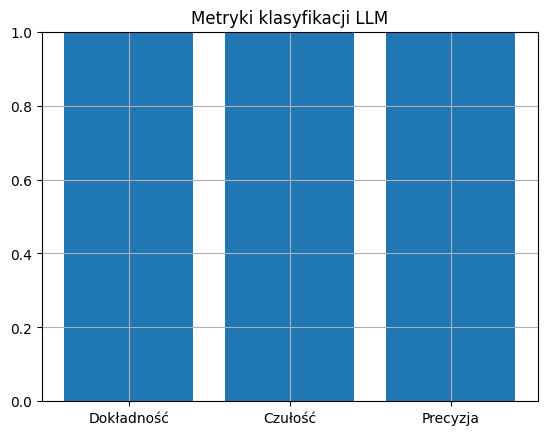

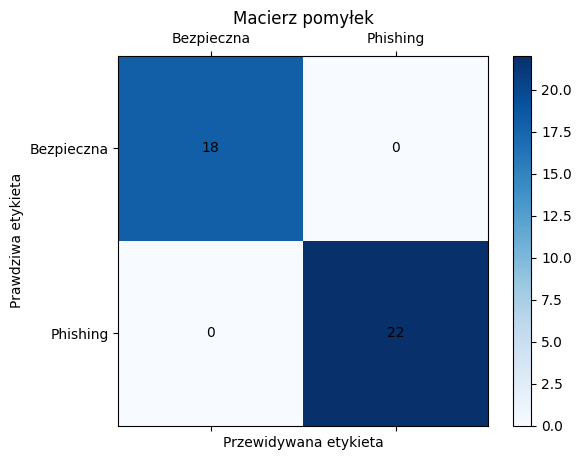

In [7]:

import pandas as pd
from openai import OpenAI
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import time

# Klucz API OpenAI
client = OpenAI(api_key="KLUCZ")

# Wczytanie pliku tekstowego
file_path = "/content/wiadomosci_200.txt"
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Parsowanie danych
data = []
for line in lines:
    if ":" in line:
        label, content = line.strip().split(":", 1)
        data.append({"label_true": label.strip(), "content": content.strip()})

df = pd.DataFrame(data)

# Klasyfikacja przez GPT-4o
def classify_with_gpt(content):
    prompt = f"""
    Przeanalizuj poniższą wiadomość e-mail i odpowiedz jednym słowem: "Phishing" lub "Bezpieczna".

    Treść wiadomości:
    {content}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=10
        )
        return response.choices[0].message.content.strip().split()[0]
    except Exception as e:
        print("Błąd:", e)
        return "Błąd"

# Klasyfikacja (ograniczona do 40 wiadomości)
df_sample = df.sample(n=40, random_state=42).reset_index(drop=True)
results = []

for i, row in df_sample.iterrows():
    prediction = classify_with_gpt(row["content"])
    results.append(prediction)
    print(f"[{i+1}/40] → {prediction}")
    time.sleep(1.2)  # zachowanie limitów API

df_sample["label_predicted"] = results

# Ocena skuteczności
y_true = df_sample["label_true"].map({"Phishing": 1, "Bezpieczna": 0})
y_pred = df_sample["label_predicted"].map({"Phishing": 1, "Bezpieczna": 0})

accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print("\n📊 Wyniki klasyfikacji:")
print("Dokładność:", round(accuracy, 3))
print("Czułość (Recall):", round(recall, 3))
print("Precyzja:", round(precision, 3))
print("\nMacierz pomyłek:\n", cm)

# Wykresy
fig, ax = plt.subplots()
ax.bar(["Dokładność", "Czułość", "Precyzja"], [accuracy, recall, precision])
ax.set_ylim(0, 1)
ax.set_title("Metryki klasyfikacji LLM")
plt.grid(True)
plt.show()

# Macierz pomyłek - wykres
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')
plt.title("Macierz pomyłek")
plt.xlabel("Przewidywana etykieta")
plt.ylabel("Prawdziwa etykieta")
plt.xticks([0, 1], ["Bezpieczna", "Phishing"])
plt.yticks([0, 1], ["Bezpieczna", "Phishing"])
for (i, j), val in zip([(i, j) for i in range(2) for j in range(2)], cm.flatten()):
    ax.text(j, i, str(val), ha='center', va='center', color='black')
fig.colorbar(cax)
plt.show()

[1/200] → Bezpieczna
[2/200] → Bezpieczna
[3/200] → Bezpieczna
[4/200] → Bezpieczna
[5/200] → Phishing
[6/200] → Phishing
[7/200] → Phishing
[8/200] → Bezpieczna
[9/200] → Bezpieczna
[10/200] → Bezpieczna
[11/200] → Bezpieczna
[12/200] → Bezpieczna
[13/200] → Bezpieczna
[14/200] → Bezpieczna
[15/200] → Bezpieczna
[16/200] → Phishing
[17/200] → Phishing
[18/200] → Bezpieczna
[19/200] → Bezpieczna
[20/200] → Phishing
[21/200] → Phishing
[22/200] → Bezpieczna
[23/200] → Bezpieczna
[24/200] → Phishing
[25/200] → Phishing
[26/200] → Phishing
[27/200] → Phishing
[28/200] → Phishing
[29/200] → Bezpieczna
[30/200] → Phishing
[31/200] → Phishing
[32/200] → Phishing
[33/200] → Bezpieczna
[34/200] → Bezpieczna
[35/200] → Phishing
[36/200] → Phishing
[37/200] → Phishing
[38/200] → Bezpieczna
[39/200] → Bezpieczna
[40/200] → Bezpieczna
[41/200] → Bezpieczna
[42/200] → Phishing
[43/200] → Bezpieczna
[44/200] → Phishing
[45/200] → Phishing
[46/200] → Bezpieczna
[47/200] → Phishing
[48/200] → Phishing

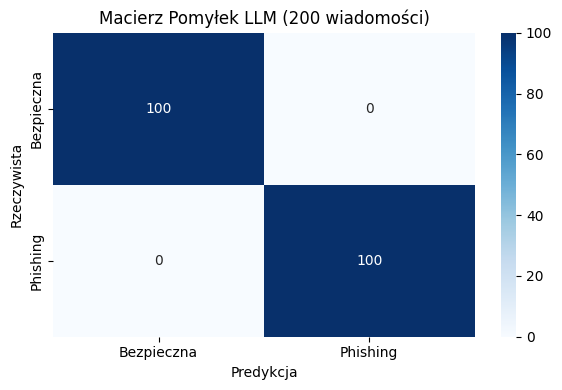

In [8]:
from openai import OpenAI
import pandas as pd
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Konfiguracja API
client = OpenAI(api_key="KLUCZ")

# Wczytanie danych
file_path = "/content/wiadomosci_200.txt"
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []
for line in lines:
    if ":" in line:
        label, content = line.strip().split(":", 1)
        data.append({"label_true": label.strip(), "content": content.strip()})

df = pd.DataFrame(data)

# Klasyfikacja
def classify_with_gpt(content):
    prompt = f"""
    Przeanalizuj poniższą wiadomość e-mail i odpowiedz jednym słowem: "Phishing" lub "Bezpieczna".

    Treść wiadomości:
    {content}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=10
        )
        return response.choices[0].message.content.strip().split()[0]
    except Exception as e:
        print("Błąd:", e)
        return "Błąd"

results = []
for i, row in df.iterrows():
    prediction = classify_with_gpt(row["content"])
    results.append(prediction)
    print(f"[{i+1}/{len(df)}] → {prediction}")
    time.sleep(1.2)

df["label_predicted"] = results

# Ocena
y_true = df["label_true"].map({"Phishing": 1, "Bezpieczna": 0})
y_pred = df["label_predicted"].map({"Phishing": 1, "Bezpieczna": 0})

print("\n📊 Wyniki klasyfikacji:")
print("Dokładność:", round(accuracy_score(y_true, y_pred), 3))
print("Czułość (Recall):", round(recall_score(y_true, y_pred), 3))
print("Precyzja:", round(precision_score(y_true, y_pred), 3))
print("\nMacierz pomyłek:\n", confusion_matrix(y_true, y_pred))

# Wizualizacja
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=["Bezpieczna", "Phishing"], yticklabels=["Bezpieczna", "Phishing"])
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista")
plt.title("Macierz Pomyłek LLM (200 wiadomości)")
plt.tight_layout()
plt.show()


In [9]:
from google.colab import files

uploaded = files.upload()

Saving curated_set.csv to curated_set.csv


[1/326] → Bezpieczna
[2/326] → Bezpieczna
[3/326] → Phishing
[4/326] → Phishing
[5/326] → Bezpieczna
[6/326] → Phishing
[7/326] → Phishing
[8/326] → Phishing
[9/326] → Phishing
[10/326] → Bezpieczna
[11/326] → Phishing
[12/326] → Phishing
[13/326] → Phishing
[14/326] → Phishing
[15/326] → Phishing
[16/326] → Bezpieczna
[17/326] → Bezpieczna
[18/326] → Phishing
[19/326] → Bezpieczna
[20/326] → Phishing
[21/326] → Bezpieczna
[22/326] → Phishing
[23/326] → Phishing
[24/326] → Bezpieczna
[25/326] → Bezpieczna
[26/326] → Phishing
[27/326] → Phishing
[28/326] → Bezpieczna
[29/326] → Phishing
[30/326] → Phishing
[31/326] → Bezpieczna
[32/326] → Bezpieczna
[33/326] → Phishing
[34/326] → Bezpieczna
[35/326] → Bezpieczna
[36/326] → Phishing
[37/326] → Bezpieczna
[38/326] → Bezpieczna
[39/326] → Phishing
[40/326] → Phishing
[41/326] → Bezpieczna
[42/326] → Phishing
[43/326] → Bezpieczna
[44/326] → Bezpieczna
[45/326] → Phishing
[46/326] → Bezpieczna
[47/326] → Phishing
[48/326] → Bezpieczna
[49/3

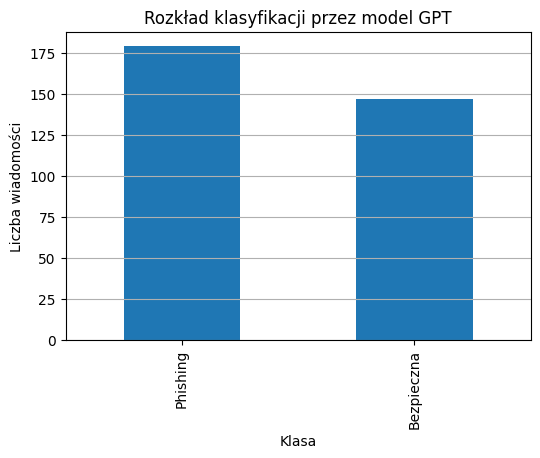

In [11]:
#Importy i biblioteki
!pip install openai matplotlib scikit-learn --quiet

from openai import OpenAI
import pandas as pd
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Klucz API
client = OpenAI(api_key="KLUCZ")

#Wczytanie rzeczywistego zbioru
df_raw = pd.read_csv("/content/curated_set.csv")

#Przetwarzanie danych
df = df_raw.copy()
df.rename(columns={"text": "content"}, inplace=True)
df["label_true"] = df["is_phishing"].map({1: "Phishing", 0: "Bezpieczna"})

#Klasyfikacja z GPT
def classify_with_gpt(content):
    prompt = f"""
    Przeanalizuj poniższą wiadomość e-mail i odpowiedz tylko jednym słowem: "Phishing" lub "Bezpieczna".

    Treść wiadomości:
    {content}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=10
        )
        return response.choices[0].message.content.strip().split()[0]
    except Exception as e:
        print("Błąd:", e)
        return "Błąd"


results = []
for i, row in df.iterrows():
    prediction = classify_with_gpt(row["content"])
    results.append(prediction)
    print(f"[{i+1}/{len(df)}] → {prediction}")
    time.sleep(1.2)

df["label_predicted"] = results

#Metryki
y_true = df["label_true"].map({"Phishing": 1, "Bezpieczna": 0})
y_pred = df["label_predicted"].map({"Phishing": 1, "Bezpieczna": 0})

print("\n📊 Wyniki klasyfikacji:")
print("Dokładność:", round(accuracy_score(y_true, y_pred), 3))
print("Czułość (Recall):", round(recall_score(y_true, y_pred), 3))
print("Precyzja:", round(precision_score(y_true, y_pred), 3))
print("\nMacierz pomyłek:\n", confusion_matrix(y_true, y_pred))

#Wykres: Liczba trafień
plt.figure(figsize=(6, 4))
df["label_predicted"].value_counts().plot(kind="bar")
plt.title("Rozkład klasyfikacji przez model GPT")
plt.xlabel("Klasa")
plt.ylabel("Liczba wiadomości")
plt.grid(axis="y")
plt.show()
